# Projeto Airbnb Rio - Ferramenta de Previsão de Preço de Imóvel para pessoas comuns 

### Contexto

No Airbnb, qualquer pessoa que tenha um quarto ou um imóvel de qualquer tipo (apartamento, casa, chalé, pousada, etc.) pode ofertar o seu imóvel para ser alugado por diária.

Você cria o seu perfil de host (pessoa que disponibiliza um imóvel para aluguel por diária) e cria o anúncio do seu imóvel.

Nesse anúncio, o host deve descrever as características do imóvel da forma mais completa possível, de forma a ajudar os locadores/viajantes a escolherem o melhor imóvel para eles (e de forma a tornar o seu anúncio mais atrativo)

Existem dezenas de personalizações possíveis no seu anúncio, desde quantidade mínima de diária, preço, quantidade de quartos, até regras de cancelamento, taxa extra para hóspedes extras, exigência de verificação de identidade do locador, etc.

### Nosso objetivo

Construir um modelo de previsão de preço que permita uma pessoa comum que possui um imóvel possa saber quanto deve cobrar pela diária do seu imóvel.

Ou ainda, para o locador comum, dado o imóvel que ele está buscando, ajudar a saber se aquele imóvel está com preço atrativo (abaixo da média para imóveis com as mesmas características) ou não.

### O que temos disponível, inspirações e créditos

As bases de dados foram retiradas do site kaggle: https://www.kaggle.com/allanbruno/airbnb-rio-de-janeiro

Elas estão disponíveis para download abaixo da aula (se você puxar os dados direto do Kaggle pode ser que encontre resultados diferentes dos meus, afinal as bases de dados podem ter sido atualizadas).

Caso queira uma outra solução, podemos olhar como referência a solução do usuário Allan Bruno do kaggle no Notebook: https://www.kaggle.com/allanbruno/helping-regular-people-price-listings-on-airbnb

Você vai perceber semelhanças entre a solução que vamos desenvolver aqui e a dele, mas também algumas diferenças significativas no processo de construção do projeto.

- As bases de dados são os preços dos imóveis obtidos e suas respectivas características em cada mês.
- Os preços são dados em reais (R$)
- Temos bases de abril de 2018 a maio de 2020, com exceção de junho de 2018 que não possui base de dados

### Expectativas Iniciais

- Acredito que a sazonalidade pode ser um fator importante, visto que meses como dezembro costumam ser bem caros no RJ
- A localização do imóvel deve fazer muita diferença no preço, já que no Rio de Janeiro a localização pode mudar completamente as características do lugar (segurança, beleza natural, pontos turísticos)
- Adicionais/Comodidades podem ter um impacto significativo, visto que temos muitos prédios e casas antigos no Rio de Janeiro

Vamos descobrir o quanto esses fatores impactam e se temos outros fatores não tão intuitivos que são extremamente importantes.

### Importar Bibliotecas e Bases de Dados

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px

from pathlib import Path
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split


In [114]:
# path_data = Path('/content/drive/MyDrive/Colab Notebooks/')
# # print(path_data.iterdir())
# for file in path_data.iterdir():
#   if '.csv' in file.name:
#       print(file.name)

airbnb = pd.read_csv('Airbnb_rj.csv')

### Consolidar Base de Dados

In [12]:
# #Set an empty DataFrame
# month = {'jan': 1, 'fev':2, 'mar':3, 'abr': 4, 'mai':5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

# airbnb_df = pd.DataFrame()
# #Set datasets path.
# path_data = Path('/content/')
# #Iterate all the files in selected path.
# for file in path_data.iterdir():
#     if '.csv' in file.name:
#         df = pd.read_csv(f'{file.name}')
#         df['month'] = month[file.name[:3]]
#         df['year'] = int(file.name[-8:-4])
#         airbnb_df = airbnb_df.append(df)

# # display(airbnb_df)

In [19]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# airbnb_df.head(1000).to_csv('earliest records.csv')

In [20]:
# columns = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','month','year']


# airbnb_df = airbnb_df.loc[:, columns]
# # display(airbnb_df)

### Se tivermos muitas colunas, já vamos identificar quais colunas podemos excluir

### Handling Missing Values

- Analyzing the data, we can see that there are many empty values. The columns with more than 300,000 NaN values have been eliminated.
- For the other columns, since we still have a lot of data (more than 900,000 rows), we will just discard the NaN data.

In [ ]:
# for column in airbnb_df:
#     if airbnb_df[column].isnull().sum() > 300000:
#         airbnb_df = airbnb_df.drop(column, axis=1)

# airbnb_df = airbnb_df.dropna()

# print(airbnb_df.shape)

### Verificar Tipos de Dados em cada coluna

In [ ]:
# print(airbnb_df.dtypes)
# print('-' * 55)
# print(airbnb_df.iloc[0])

In [ ]:
# # column price and extra people --> float
# airbnb_df['price'] = airbnb_df['price'].str.replace('$', '')
# airbnb_df['price'] = airbnb_df['price'].str.replace(',', '')
# airbnb_df['price'] = airbnb_df['price'].astype(np.float32, copy=False)

# airbnb_df['extra_people'] = airbnb_df['extra_people'].str.replace('$', '')
# airbnb_df['extra_people'] = airbnb_df['extra_people'].str.replace(',', '')
# airbnb_df['extra_people'] = airbnb_df['extra_people'].astype(np.float32, copy=False)

# print(airbnb_df.dtypes)

### Análise Exploratória e Tratar Outliers

In [ ]:
# plt.figure(figsize=(14,9))
# sns.heatmap(airbnb_df.corr(), annot=True, cmap='Greens')

In [115]:
def limits(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    amplitude = q3 - q1

    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def del_outliers(df, column):
    rows_qtt = df.shape[0]
    bottom_lim, top_lim = limits(df[column])
    df = df.loc[(df[column] >= bottom_lim) & (df[column] <= top_lim), :]

    return df, rows_qtt - df.shape[0]

In [116]:
def box_diagram(column):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=column, ax=ax1)
    ax2.set_xlim(limits(column))
    sns.boxplot(x=column, ax=ax2)

def histogram(column):
    plt.figure(figsize=(15,5))
    sns.histplot(column, kde=True, linewidth=0)

def bar_graph(column):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=column.value_counts().index, y=column.value_counts())
    ax.set_xlim(limits(column))

## Price

In [ ]:
# box_diagram(airbnb_df['price'])
# histogram(airbnb_df['price'])

In [ ]:
# airbnb_df, removed_rows = del_outliers(airbnb_df, 'price')
# print(f'{removed_rows} Removed rows.')

In [ ]:
# histogram(airbnb_df['price'])

## Extra People

In [ ]:
# box_diagram(airbnb_df['extra_people'])
# histogram(airbnb_df['extra_people'])
# print(airbnb_df['extra_people'].max())

In [ ]:
# airbnb_df, removed_rows = del_outliers(airbnb_df, 'extra_people')
# print(f'{removed_rows} Removed rows.')

In [ ]:
# histogram(airbnb_df['extra_people'])


### host_listings_count

In [ ]:
# box_diagram(airbnb_df['host_listings_count'])
# bar_graph(airbnb_df['host_listings_count'])

In [ ]:
# airbnb_df, removed_rows = del_outliers(airbnb_df, 'host_listings_count')
# print(f'{removed_rows} removed rows')

### Accommodates

In [ ]:
# box_diagram(airbnb_df['accommodates'])
# bar_graph(airbnb_df['accommodates'])

### Bathrooms

In [ ]:
# box_diagram(airbnb_df['bathrooms'])
# plt.figure(figsize=(15,5))
# sns.barplot(x=airbnb_df['bathrooms'].value_counts().index, y=airbnb_df['bathrooms'].value_counts())

### Bedrooms

In [ ]:
# box_diagram(airbnb_df['bedrooms'])
# bar_graph(airbnb_df['bedrooms'])

### Beds

In [ ]:
# box_diagram(airbnb_df['beds'])
# bar_graph(airbnb_df['beds'])

### guests_included

In [ ]:
# plt.figure(figsize=(15,5))
# sns.barplot(x=airbnb_df['guests_included'].value_counts().index, y=airbnb_df['guests_included'].value_counts())

In [ ]:
# airbnb_df = airbnb_df.drop('guests_included', axis=1)
# airbnb_df.shape

### minimum_nights

In [ ]:
# box_diagram(airbnb_df['minimum_nights'])
# bar_graph(airbnb_df['minimum_nights'])

In [ ]:
# airbnb_df, removed_rows = del_outliers(airbnb_df, 'minimum_nights')
# print(f'{removed_rows} removed rows')

### maximum_nights

In [ ]:
# box_diagram(airbnb_df['maximum_nights'])
# bar_graph(airbnb_df['maximum_nights'])

In [ ]:
# airbnb_df = airbnb_df.drop('maximum_nights', axis=1)
# airbnb_df.shape

### number_of_reviews

In [ ]:
# box_diagram(airbnb_df['number_of_reviews'])
# bar_graph(airbnb_df['number_of_reviews'])

In [ ]:
# airbnb_df = airbnb_df.drop('number_of_reviews', axis=1)
# airbnb_df.shape

### Tratamento de Colunas de Valores de Texto


- property_type

In [ ]:
# print(airbnb_df['property_type'].value_counts())
# plt.figure(figsize=(15, 5))
# graph = sns.countplot(x=airbnb_df['property_type'])
# graph.tick_params(axis='x', rotation=90)

In [ ]:
# house_types = airbnb_df['property_type'].value_counts()
# columns_group = [kind for kind in house_types.index if house_types[kind] < 2100]
# print(columns_group)

# for kind in columns_group:
#     airbnb_df.loc[airbnb_df['property_type']==kind, 'property_type'] = 'Others'


# print(airbnb_df['property_type'].value_counts())

# # plt.figure(figsize=(15, 5))
# # graph = sns.countplot(x=airbnb_df['property_type'])
# # graph.tick_params(axis='x', rotation=90)

- room_type

In [ ]:
# print(airbnb_df['room_type'].value_counts())

# # plt.figure(figsize=(15, 5))
# # grafico = sns.countplot(x=airbnb_df['room_type'])


- ### bed_type

In [ ]:
# print(airbnb_df['bed_type'].value_counts())

# # plt.figure(figsize=(15, 5))
# # grafico = sns.countplot(x=airbnb_df['bed_type'])

# bed_type = airbnb_df['bed_type'].value_counts()
# columns_group = [kind for kind in bed_type.index if bed_type[kind] < 10000]
# print(columns_group)

# for kind in columns_group:
#     airbnb_df.loc[airbnb_df['bed_type']==kind, 'bed_type'] = 'Others'


# print(airbnb_df['bed_type'].value_counts())

# # plt.figure(figsize=(15, 5))
# # graph = sns.countplot(x=airbnb_df['bed_type'])

- ### cancellation_policy 

In [ ]:
# print(airbnb_df['cancellation_policy'].value_counts())

# # plt.figure(figsize=(15, 5))
# # grafico = sns.countplot(x=airbnb_df['cancellation_policy'])

# cancellation_policy = airbnb_df['cancellation_policy'].value_counts()
# columns_group = [kind for kind in cancellation_policy.index if cancellation_policy[kind] < 10400]
# print(columns_group)

# for kind in columns_group:
#     airbnb_df.loc[airbnb_df['cancellation_policy']==kind, 'cancellation_policy'] = 'strict'


# print(airbnb_df['cancellation_policy'].value_counts())

# # plt.figure(figsize=(15, 5))
# # graph = sns.countplot(x=airbnb_df['cancellation_policy'])

- ### amenities 


In [130]:
print(airbnb['amenities'].iloc[1].split(','))
print(len(airbnb['amenities'].iloc[1].split(',')))

airbnb['n_amenities'] = airbnb['amenities'].str.split(',').apply(len)

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', 'Doorman', 'Elevator', '"Buzzer/wireless intercom"', 'Heating', 'Washer', 'Dryer', 'Essentials', 'Shampoo', '"24-hour check-in"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"}']
19


In [132]:
airbnb = airbnb.drop('amenities', axis=1)
airbnb.shape

(591885, 21)

In [ ]:
# box_diagram(airbnb_df['n_amenities'])
# bar_graph(airbnb_df['n_amenities'])

In [133]:
airbnb, removed_rows = del_outliers(airbnb, 'n_amenities')
print(f'{removed_rows} removed rows')


8373 removed rows


In [139]:
airbnb = airbnb.drop('Unnamed: 0', axis=1)
display(airbnb.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 583512 entries, 0 to 591884
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   host_is_superhost         583512 non-null  object 
 1   host_listings_count       583512 non-null  float64
 2   latitude                  583512 non-null  float64
 3   longitude                 583512 non-null  float64
 4   property_type             583512 non-null  object 
 5   room_type                 583512 non-null  object 
 6   accommodates              583512 non-null  int64  
 7   bathrooms                 583512 non-null  float64
 8   bedrooms                  583512 non-null  float64
 9   beds                      583512 non-null  float64
 10  bed_type                  583512 non-null  object 
 11  price                     583512 non-null  float64
 12  extra_people              583512 non-null  float64
 13  minimum_nights            583512 non-null  i

None

### Property map view


In [117]:
# samples = airbnb.sample(n=50000)
# map_center = {'lat':samples.latitude.mean(), 'lon':samples.longitude.mean()}
# map = px.density_mapbox(samples, lat='latitude', lon='longitude',z='price', radius=2.5,
#                         center=map_center, zoom=10,
#                         mapbox_style='stamen-terrain')
# map.show()

### Encoding

In [140]:
# print(airbnb.iloc[0])
display(airbnb.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
price                       float64
extra_people                float64
minimum_nights                int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
month                         int64
year                          int64
n_amenities                   int64
dtype: object

In [141]:
true_false_columns = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
encoded_df = airbnb.copy()

for column in true_false_columns:
  encoded_df.loc[encoded_df[column]=='t', column] = 1
  encoded_df.loc[encoded_df[column]=='f', column] = 0

print(encoded_df.iloc[0])

host_is_superhost                                     1
host_listings_count                                 2.0
latitude                                      -22.96592
longitude                                     -43.17896
property_type                               Condominium
room_type                               Entire home/apt
accommodates                                          5
bathrooms                                           1.0
bedrooms                                            2.0
beds                                                2.0
bed_type                                       Real Bed
price                                             332.0
extra_people                                       63.0
minimum_nights                                        5
instant_bookable                                      1
is_business_travel_ready                              0
cancellation_policy         strict_14_with_grace_period
month                                           

In [142]:
categories_columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']
encoded_df = pd.get_dummies(data=encoded_df, columns=categories_columns)
display(encoded_df.head())

,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,extra_people,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Others,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period
0,1,2.0,-22.96592,-43.17896,5,1.0,2.0,2.0,332.0,63.0,...,1,0,0,0,0,1,0,0,0,1
1,0,0.0,-22.98467,-43.19611,6,2.0,2.0,4.0,336.0,0.0,...,1,0,0,0,0,1,0,0,0,1
2,0,3.0,-22.97712,-43.19045,2,1.0,1.0,2.0,159.0,45.0,...,1,0,0,0,0,1,0,0,0,1
3,1,1.0,-22.98302,-43.21427,3,1.0,1.0,2.0,273.0,42.0,...,1,0,0,0,0,1,0,0,0,1
4,0,1.0,-22.98816,-43.19359,2,1.5,1.0,1.0,378.0,63.0,...,1,0,0,0,0,1,0,0,0,1


### Modelo de Previsão

- Evaluation Metrics

In [143]:
def evaluate_model(model_name, y_test, forecast):
    r2 = r2_score(y_test, forecast)
    RSME = np.sqrt(mean_squared_error(y_test, forecast))

    return f'{model_name} model:\nR²: {r2:.2%}\nRSME: {RSME:.2f}'

- Choosing the model to be tested

In [144]:
model_rf = RandomForestRegressor()
model_lr = LinearRegression()
model_et = ExtraTreesRegressor()

models = {'RandomForest': model_rf,
          'LinearRegression': model_lr,
          'ExtraTrees': model_et,
          }

y = encoded_df['price']
X = encoded_df.drop('price', axis=1)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

for model_name, model in models.items():
    #training
    model.fit(X_train, y_train)
    #testing
    forecast = model.predict(X_test)
    print(evaluate_model(model_name, y_test, forecast))

RandomForest model:
R²: 97.33%
RSME: 44.61
LinearRegression model:
R²: 33.59%
RSME: 222.44
ExtraTrees model:
R²: 97.52%
RSME: 42.95


### Análise do Melhor Modelo

### Ajustes e Melhorias no Melhor Modelo

,0
room_type_Entire home/apt,0.102125
longitude,0.097848
latitude,0.097787
accommodates,0.096343
extra_people,0.089643
bathrooms,0.083936
n_amenities,0.082252
minimum_nights,0.063608
bedrooms,0.062135
beds,0.051333


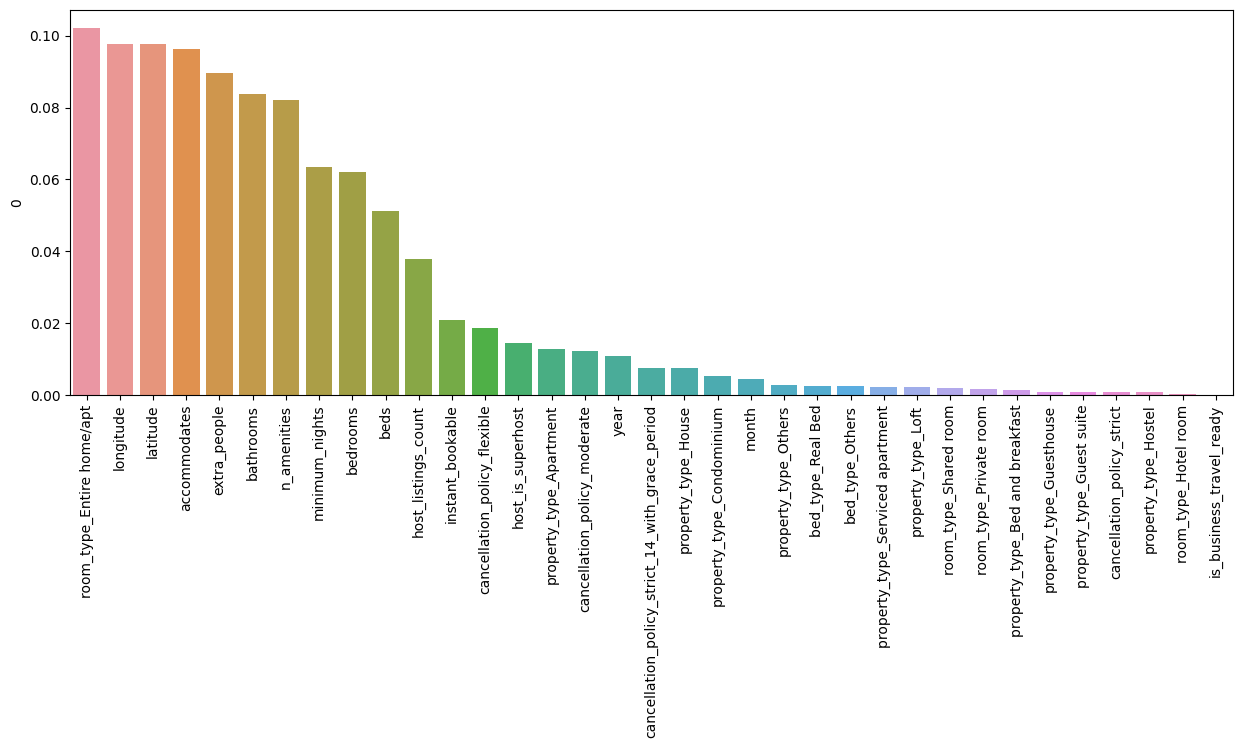

In [146]:
importancia_features = pd.DataFrame(model_et.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

In [147]:
encoded_df = encoded_df.drop('is_business_travel_ready', axis=1)

y = encoded_df['price']
X = encoded_df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

model_et.fit(X_train, y_train)
forecast = model_et.predict(X_test)
print(evaluate_model('ExtraTrees', y_test, forecast))

ExtraTrees model:
R²: 97.54%
RSME: 42.84
